In [1]:
using DelimitedFiles
using PyPlot
using Random

In [2]:
all_words = readdlm("english_words.txt", '\n', String);

In [3]:
function acceptable_word(word)
    if length(word) != 5
        return false
    end
    if all([letter in [char for char in 'a':'z'] for letter in word])
        return true
    else
        return false
    end
end

acceptable_word (generic function with 1 method)

In [4]:
five_lettr_words = String[]
for word in all_words
    if acceptable_word(word)
        push!(five_lettr_words, word)
    end
end

In [5]:
writedlm("5_letter_words.txt", five_lettr_words, '\n')

In [64]:
include("wordle.jl")
include("WordleKiller.jl")

Main.WordleKiller

In [52]:
WordleKiller.play_one_game(guess_alg = WordleKiller.random_guess)

Algorithm won! Target word was dried

The guesses made were:

Round 1: timer
Round 2: doled
Round 3: dared
Round 4: dewed
Round 5: duped
Round 6: dried


(true, 6)

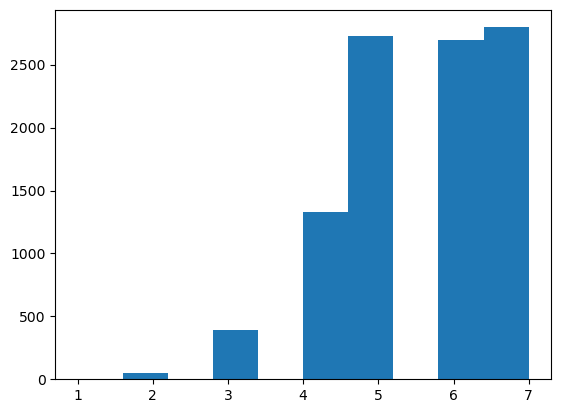

Winrate is 0.7203


([1.0, 51.0, 0.0, 393.0, 0.0, 1329.0, 2731.0, 0.0, 2698.0, 2797.0], [1.0, 1.6, 2.2, 2.8, 3.4, 4.0, 4.6, 5.2, 5.8, 6.3999999999999995, 7.0], (PyObject <matplotlib.patches.Rectangle object at 0x000000000123F3D0>, PyObject <matplotlib.patches.Rectangle object at 0x000000000123F250>, PyObject <matplotlib.patches.Rectangle object at 0x000000000123F8B0>, PyObject <matplotlib.patches.Rectangle object at 0x000000000123FB80>, PyObject <matplotlib.patches.Rectangle object at 0x000000000123FE50>, PyObject <matplotlib.patches.Rectangle object at 0x000000000124B160>, PyObject <matplotlib.patches.Rectangle object at 0x000000000124B430>, PyObject <matplotlib.patches.Rectangle object at 0x000000000124B700>, PyObject <matplotlib.patches.Rectangle object at 0x000000000124B9D0>, PyObject <matplotlib.patches.Rectangle object at 0x000000000124BCA0>))

In [53]:
wins = 0
losses = 0
rounds_dist = []
for i in 1:10000
    a_win, rounds = WordleKiller.play_one_game(false, guess_alg = WordleKiller.random_guess)
    push!(rounds_dist, rounds)
    if a_win
        wins += 1
    else
        losses += 1
    end
end
WR = wins/(wins+losses)
println("Winrate is $WR")
hist(rounds_dist)

In [54]:
function generate_random_database(N)
    database = String[]
    for i in 1:N
        str = ""
        found_str = false
        while !found_str
            str = randstring('a':'z', 5)
            if !(str in database)
                found_str = true
            end
        end
        push!(database, str)
    end
    return database
end

generate_random_database (generic function with 1 method)

In [ ]:
DB_sizes = collect(1000:1000:100000)
WRs = zeros(length(DB_sizes))
for (n, N) in enumerate(DB_sizes)
    wins = 0
    losses = 0
    database = generate_random_database(N)
    for i in 1:10000
        a_win, rounds = WordleKiller.play_one_game(false, database = database, guess_alg = WordleKiller.random_word)
        if a_win
            wins += 1
        else
            losses += 1
        end
    end
    WRs[n] = wins/(wins+losses)
end

In [ ]:
plot(DB_sizes, WRs)
xlabel("Database Size")
ylabel("Winrate")
title("Random Selection Algorithm")